LIBS

In [42]:
import cv2 as cv
import numpy as np
import dlib
import matplotlib.pyplot as plt
from scipy.spatial import distance 

IMAGEM

In [124]:
img = cv.imread('data/aberto.png')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

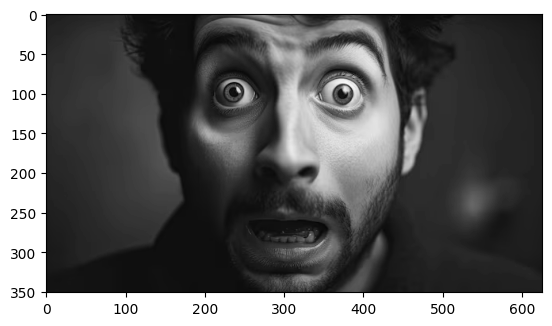

In [125]:
plt.imshow(gray_img, cmap='gray')

DLIB

In [104]:
classificado_dlib_68 = dlib.shape_predictor("classificador\shape_predictor_68_face_landmarks.dat")
print(classificado_dlib_68)

In [105]:
face_detector = dlib.get_frontal_face_detector()
print(face_detector)

IDENTIFICAR ROSTO

In [106]:
def get_face_rect(img):
    rects = face_detector(img, 1)
    
    # Verifica se encontrou algum rosto
    if len(rects) == 0:
        return None  # Nenhum rosto encontrado
    
    return rects


Rosto: 0


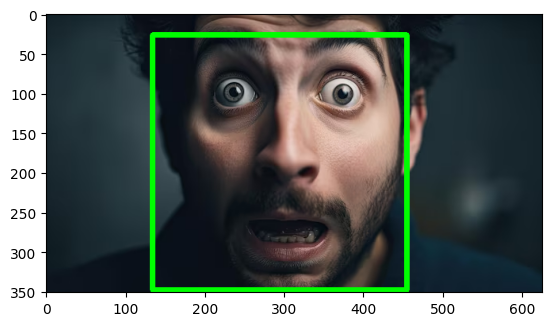

In [126]:
rects = get_face_rect(gray_img)
rect_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
color = (0, 255, 0)

for k,d in enumerate(rects):
        print(f'Rosto: {k}')
        cv.rectangle(rect_img,(d.left(),d.top()), (d.right(),d.bottom()), color, 5)
      
plt.imshow(rect_img)

MACROS FACIAIS

In [108]:
def get_macros(img):
    rect = face_detector(img, 1)
    
    if len(rect) == 0:
        return None
    
    macros = []

    for ret in rect:
        macros.append(np.matrix([[p.x, p.y] for p in classificado_dlib_68(img,ret).parts()]))
    

    return macros    

In [127]:
macros_faciais = get_macros(gray_img)
print(len(macros_faciais))
print(len(macros_faciais[0]))

1
68


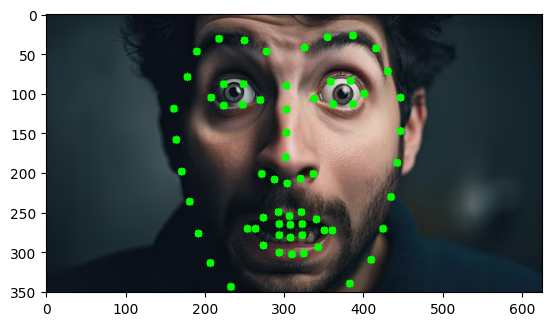

In [128]:
macro_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
color = (0, 255, 0)

for macro in macros_faciais:
    for idx, ponto in enumerate(macro):
        centro = (ponto[0, 0], ponto[0, 1])
        cv.circle(macro_img, centro, 5, color, -1)
        # cv.putText(macro_img, str(idx), centro, cv.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

plt.imshow(macro_img)

ASPECTO DE RAZOES  

In [118]:
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIRETA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36, 42))
OLHO_ESQUERDO = list(range(42, 48))
NARIZ = list(range(27, 35))
MANDIBULA = list(range(0, 17))


In [119]:
def aspecto_razao_olhos(pontos_olhos):
    # Verificar a entrada e convertê-la para numpy array se necessário
    pontos_olhos = np.array(pontos_olhos)

    # Calculando as distâncias
    a = distance.euclidean(pontos_olhos[1], pontos_olhos[5])  # Distância entre pontos [1] e [5]
    b = distance.euclidean(pontos_olhos[2], pontos_olhos[4])  # Distância entre pontos [2] e [4]
    c = distance.euclidean(pontos_olhos[0], pontos_olhos[3])  # Distância entre pontos [0] e [3]

    # Calculando a razão de aspecto
    aspecto_razao = (a + b) / (2.0 * c)

    return aspecto_razao

In [120]:
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = face_detector(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]
        
        pontos = cv.convexHull(marco[OLHO_ESQUERDO])
        cv.drawContours(imagem, [pontos], 0, (0,255,0), 2)
        
        pontos = cv.convexHull(marco[OLHO_DIREITO])
        cv.drawContours(imagem, [pontos], 0, (0,255,0), 2)
    
    return imagem

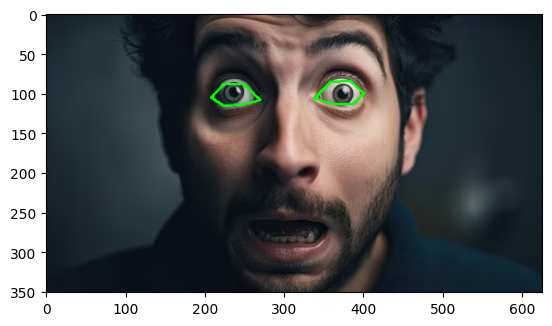

In [129]:
eye_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
eye_img = anotar_marcos_casca_convexa(eye_img, macros_faciais)
plt.imshow(eye_img)


In [130]:
macros_faciais[0][OLHO_ESQUERDO]


matrix([[338, 107],
        [359,  86],
        [384,  85],
        [401, 101],
        [387, 114],
        [362, 114]])

In [131]:
valor_olho_esquerdo = aspecto_razao_olhos(macros_faciais[0][OLHO_ESQUERDO])
valor_olho_direito = aspecto_razao_olhos(macros_faciais[0][OLHO_DIREITO])
print(valor_olho_esquerdo)
print(valor_olho_direito)

0.4528320483995296
0.42707471927430685
